This notebook contains an analysis workflow for plotting refinement results from MAUD batch mode (http://maud.radiographema.eu/) and extracting crystallographic texture data for analysis using the MTEX toolbox in MATLAB (https://mtex-toolbox.github.io)

## Import packages

In [140]:
import pathlib
import re

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

## Plotting refinement results

Read in results of the fit from the text file:

In [141]:
# user inputs

# test number
test_number = 65

# which phase is being refined?
phase = 'alpha'

# list the number of refinement iterations
number_of_iterations = [1,2,5,10,20,30,40,50,100]

In [142]:
results_file = f'../analysis/{test_number:03d}/results_minimise_error/batch_results_{test_number:03d}_{phase}_10iter.txt'
results = np.loadtxt(results_file, usecols = np.arange(0,19), dtype='str', skiprows = 1)

Read in the data headers:

In [143]:
with open (results_file) as file:
    header = file.readline().split()
    for i in range(0, len(header)):
        print('header column ', i ,' = ', header[i])

header column  0  =  Title
header column  1  =  Rwp(%)
header column  2  =  Phase_Name
header column  3  =  Vol.(%)
header column  4  =  error(%)
header column  5  =  Wt.(%)
header column  6  =  error(%)
header column  7  =  Cell_Par(Angstrom)
header column  8  =  Cell_Par(Angstrom)
header column  9  =  Size(Angstrom)
header column  10  =  Microstrain
header column  11  =  Phase_Name
header column  12  =  Vol.(%)
header column  13  =  error(%)
header column  14  =  Wt.(%)
header column  15  =  error(%)
header column  16  =  Cell_Par(Angstrom)
header column  17  =  Size(Angstrom)
header column  18  =  Microstrain


Write the results of the fit to a dictionary:

In [144]:
results_dict={}

for iteration in number_of_iterations:
    
    results_dict[str(iteration)]={}
    
    results_file = f'../analysis/{test_number:03d}/results_minimise_error/batch_results_{test_number:03d}_{phase}_{iteration}iter.txt'
    results = np.loadtxt(results_file, usecols = np.arange(0,19), dtype='str', skiprows = 1)

    results_dict[str(iteration)]['title'] = results[:,0]
    results_dict[str(iteration)]['R_wp'] = results[:,1].astype(np.float)
    results_dict[str(iteration)]['phase'] = results[0,2]
    results_dict[str(iteration)]['volume'] = results[:,3].astype(np.float)
    results_dict[str(iteration)]['vol_error'] = results[:,4].astype(np.float)
    results_dict[str(iteration)]['weight_percent'] = results[:,5].astype(np.float)
    results_dict[str(iteration)]['weight_error'] = results[:,6].astype(np.float)
    results_dict[str(iteration)]['cell_par_a'] = results[:,7].astype(np.float)
    results_dict[str(iteration)]['cell_par_c'] = results[:,8].astype(np.float)
    results_dict[str(iteration)]['size'] = results[:,9].astype(np.float)
    results_dict[str(iteration)]['microstrain'] = results[:,10].astype(np.float)
    results_dict[str(iteration)]['phase2'] = results[0,11]
    results_dict[str(iteration)]['volume2'] = results[:,12].astype(np.float)
    results_dict[str(iteration)]['vol_error2'] = results[:,13].astype(np.float)
    results_dict[str(iteration)]['weight_percent2'] = results[:,14].astype(np.float)
    results_dict[str(iteration)]['weight_error2'] = results[:,15].astype(np.float)
    results_dict[str(iteration)]['cell_par_a2'] = results[:,16].astype(np.float)
    results_dict[str(iteration)]['size2'] = results[:,17].astype(np.float)
    results_dict[str(iteration)]['microstrain2'] = results[:,18].astype(np.float)

There is a problem with saving the test number in the results text file within MAUD. So, use this to record the test number.

In [145]:
test_number = []

for number in range(3100,3450,50):
    test_number.append(int(number))
    
print('test_number =', test_number)

test_number = [3100, 3150, 3200, 3250, 3300, 3350, 3400]


Plotting parameters:

In [146]:
plt.rc('xtick', labelsize = 24)
plt.rc('ytick', labelsize = 24)
plt.rc('legend', fontsize = 20)
plt.rc('axes', linewidth = 2)
plt.rc('xtick.major', width = 2, size = 10)
plt.rc('xtick.minor', width = 2, size = 5)
plt.rc('ytick.major', width = 2, size = 10)
plt.rc('ytick.minor', width = 2, size = 5)

In [147]:
def colour_range(N: int = 9, colour_map: str = 'viridis'):
    """ Return a range of hex colour codes for a particular colour map.
    
    :param N: number of desired colour codes (default is 9).
    :param colour_map: type of colour map (default is 'viridis').
    :return: list of hex colour codes
    """
    base = plt.cm.get_cmap(colour_map)
    colour_list = base(np.linspace(0, 1, N))
    colour_hex_list=[]
    for i in range (N-1, -1, -1):
         colour_hex_list.append(colors.rgb2hex(colour_list[i]))
    
    return colour_hex_list

Plot the goodness of fit (R<sub>wp</sub>) values:

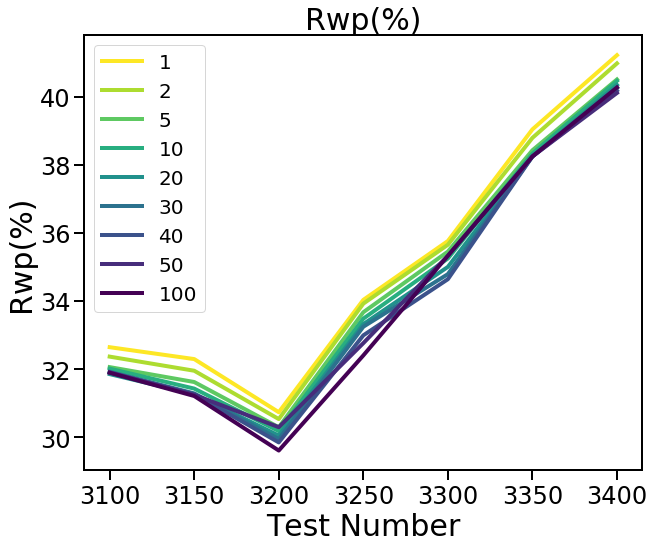

In [148]:
plt.figure(figsize=(10,8))
colour=colour_range(len(number_of_iterations))
i=0
for iteration in number_of_iterations:
    line = plt.plot(test_number, results_dict[str(iteration)]['R_wp'], color = colour[i], linewidth = 4)
    plt.title(header[1], fontsize = 30)
    i+=1
plt.xlabel('Test Number', fontsize = 30)
plt.ylabel(header[1], fontsize = 30)
plt.legend(number_of_iterations)

## Refinement time in MAUD

The approximate refinement time for a single diffraction pattern in MAUD batch mode is listed here:

- 1 iteration - 10 seconds
- 2 iterations - 20 seconds
- 5 iterations - 40 seconds
- 10 iterations - 75 seconds
- 20 iterations - 125 seconds
- 30 iterations - 170 seconds
- 40 iterations - 220 seconds
- 50 iterations - 260 seconds
- 100 iterations - 370 seconds

These results are plotted below, to give an estimate of the refinement time.

Text(0.5,1,'Refinement time for single pattern')

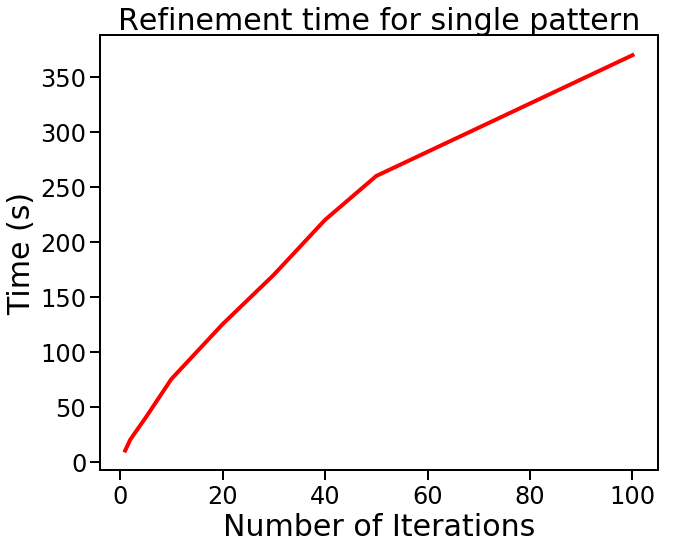

In [153]:
x = [1,2,5,10,20,30,40,50,100]
y = [10,20,40,75,125,170,220,260,370]

plt.figure(figsize=(10,8))
plt.plot(x,y,color = 'red', linewidth = 4)
plt.xlabel('Number of Iterations', fontsize = 30)
plt.ylabel('Time (s)', fontsize = 30)
plt.title('Refinement time for single pattern', fontsize = 30)